# Test for autoencoder models
* find out how good they are in separating features by labels

In [104]:
import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
import math 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [106]:
torch.manual_seed(10)

In [107]:
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

In [108]:
class simple_autoencoder(nn.Module):
    def __init__(self):
        super(simple_autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 256),
            nn.ReLU(True),
            nn.Linear(256, 128),
            nn.ReLU(True), 
            nn.Linear(128, 64), 
            nn.ReLU(True), 
            nn.Linear(64, 1))
        self.decoder = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 28 * 28), nn.Tanh())

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.decoder(x1)
        return x1, x2
# Load model from file
model = simple_autoencoder()
model_file =  '../sim_autoencoder_1.pth'
model.load_state_dict(torch.load(model_file))

num_params = sum(p.numel() for p in model.parameters())
print(f'Number of parameters: {num_params}')

Number of parameters: 485137


In [109]:
# MNIST data

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

batch_size = 1000

dataset = MNIST('./data', transform=img_transform, download=False)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


In [121]:
from collections import defaultdict

data = defaultdict(list)

In [122]:
# predict
for input_data in dataloader:
    img, label = input_data
    img = img.view(img.size(0), -1)
    with torch.no_grad():
        code, output = model(img)
        code = code.squeeze()
    
    for i in range(label.shape[0]):
        data[label[i].item()].append(code[i].item())

0 -22.089439626644133 24.69064174429571
1 0.2864221618423756 0.2946852664496966
2 -0.920360845481441 1.0784985047853433
3 -1.62834136607771 1.8925549735266678
4 1.3689776848579507 0.8917458002141828
5 0.22178754751982668 2.8936306678407595
6 -0.48815524817802247 1.478619645191546
7 1.3003358601572412 1.0111011271110444
8 -1.1208136292975737 1.727852797282846
9 1.4411804293720516 1.3981217491128466


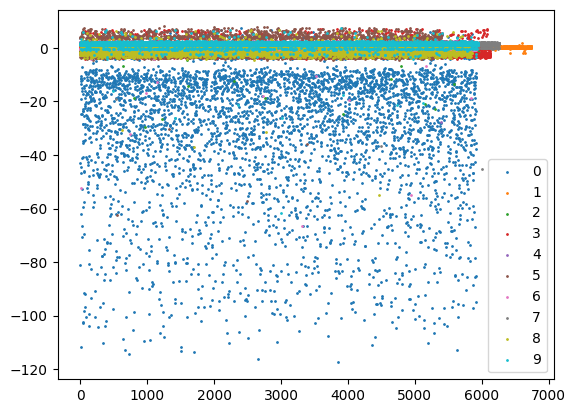

In [128]:
code_mean = []
code_std = []
for i in range(0,10):
    plt.scatter(range(len(data[i])), data[i], label=i, s=1)
    code_mean.append(np.mean(data[i]))
    code_std.append(np.std(data[i]))
    print(i, code_mean[i], code_std[i])


plt.legend()
plt.show()

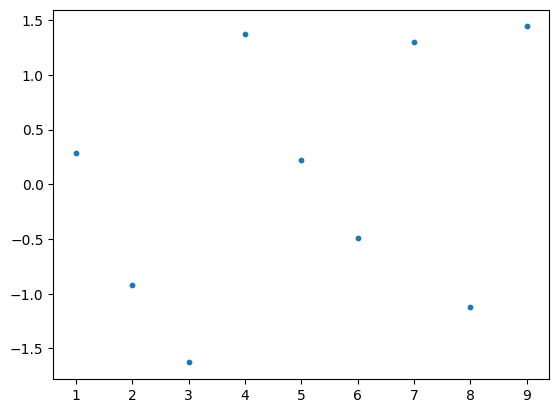

In [129]:
plt.scatter(np.arange(1,10), code_mean[1:10], s=10)

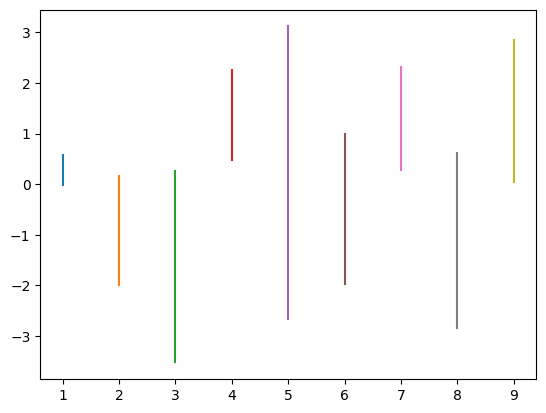

In [132]:
for i in range(1,10):
    x = [i,i]
    y = [code_mean[i]-code_std[i], code_mean[i]+code_std[i]]
    plt.plot(x,y,label=i)

In [164]:
import torch

input_tensor = torch.randn(128, 10, 1, 1)  # Example input tensor
conv_transpose = torch.nn.ConvTranspose2d(10, 16, 5, stride=1, padding=0)
output_shape = conv_transpose(input_tensor).shape
print(output_shape)  # torch.Size([128, 16, 3, 3])

torch.Size([128, 16, 5, 5])


In [165]:
input_tensor = torch.randn(128, 16, 5, 5)  # Example input tensor
conv_transpose = torch.nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1)
output_shape = conv_transpose(input_tensor).shape
print(output_shape)  # torch.Size([128, 8, 11, 11])

torch.Size([128, 8, 15, 15])


In [166]:
input_tensor = torch.randn(128, 8, 15, 15)  # Example input tensor
conv_transpose = torch.nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1)
output_shape = conv_transpose(input_tensor).shape
print(output_shape)  # torch.Size([128, 1, 16, 16])

torch.Size([128, 1, 28, 28])
